##### Îç∞Ïù¥ÌÑ∞ÏÖã ÎßÅÌÅ¨ : https://www.kaggle.com/competitions/playground-series-s4e2/data
- Ï∞∏Í≥†ÏûêÎ£å : https://www.kaggle.com/code/christina0626/feature-engineering-model-combined
- Ï∞∏Í≥†ÏûêÎ£å : https://www.kaggle.com/code/thomasmeiner/ps4e2-eda-feature-engineering-modelling


In [1]:
# MatplotlibÏóêÏÑú Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú Î≥ÄÍ≤Ω
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

Duplicate key in file PosixPath('/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family         : NanumSquareOTFRegular, Malgun Gothic, AppleGothic, Arial')


# [part1] Load Data & Í∏∞Î≥∏ EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../dataset/240225_Multi-Class Prediction of Obesity Risk/train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
null_counts = df.isnull().sum()
print(null_counts)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
df.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

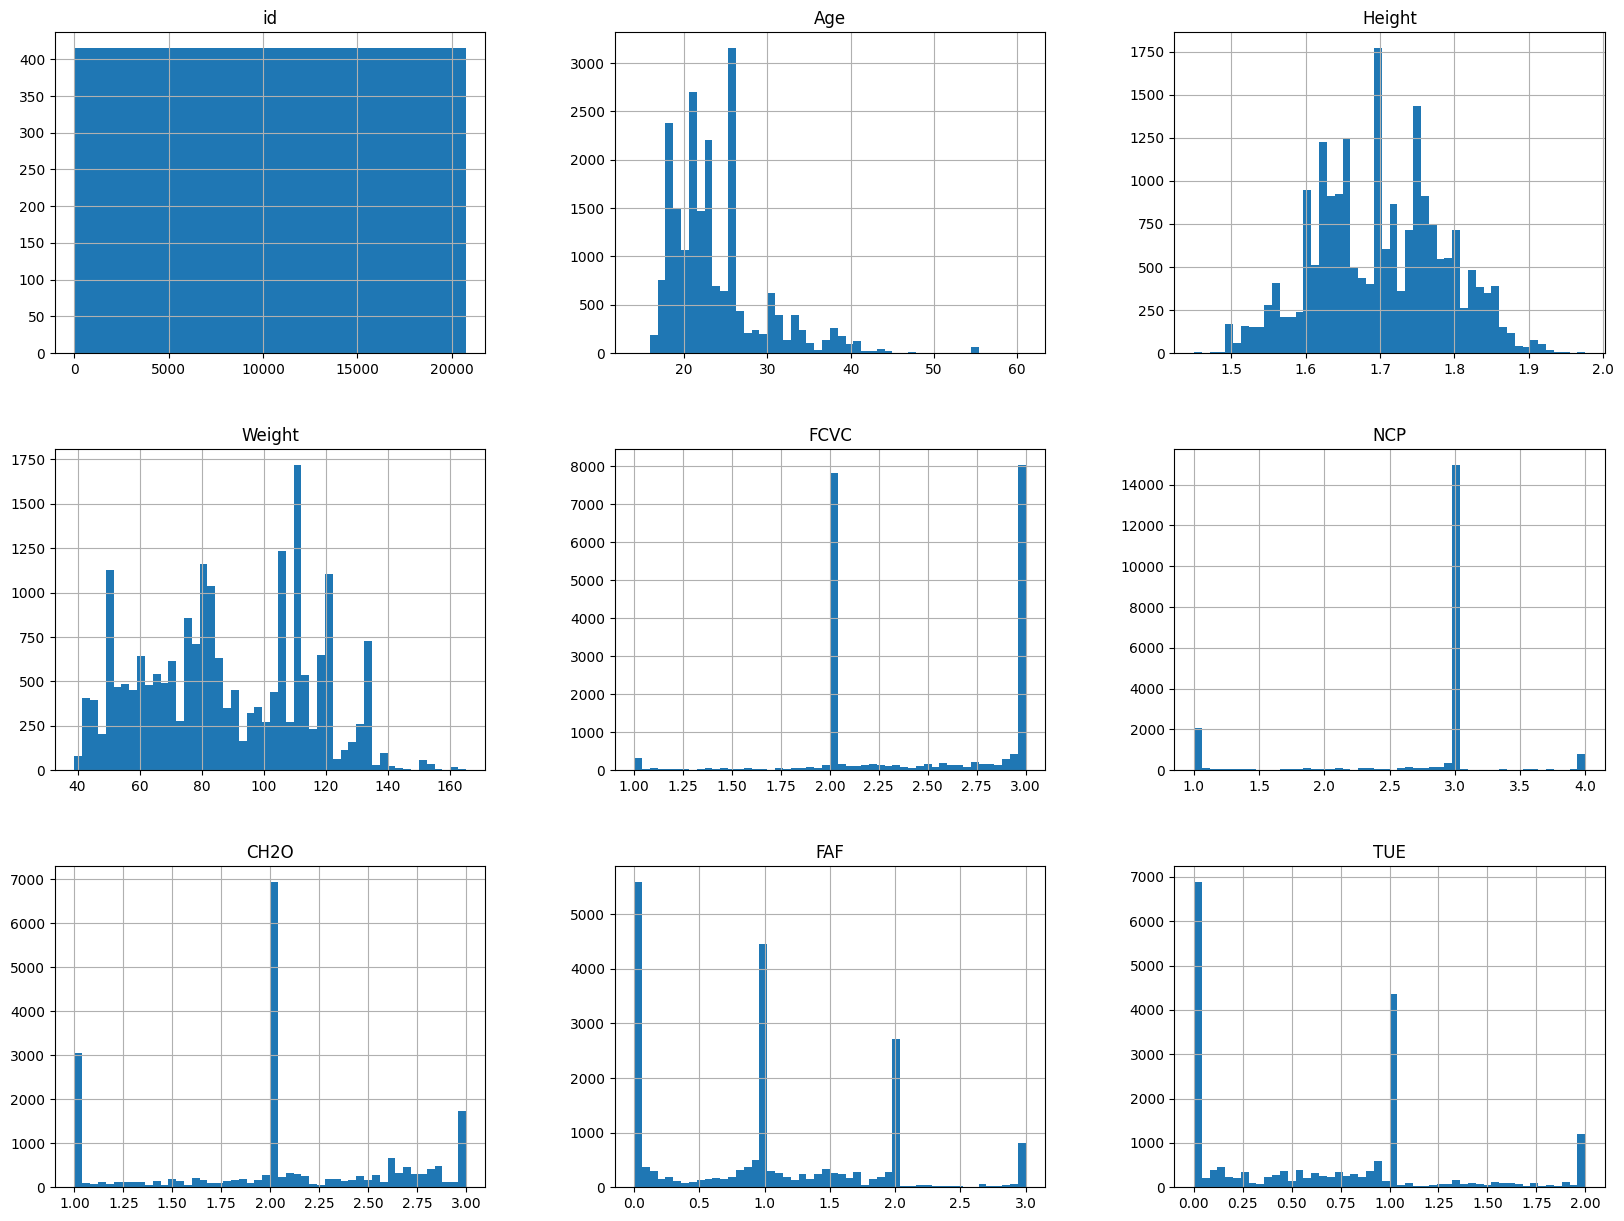

In [7]:
df.hist(bins=50,figsize=(20,15))

In [8]:
df.value_counts()

id     Gender  Age        Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24.443011  1.699998  81.669950   yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21.012569  1.697421  100.431625  yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16.496978  1.691206  82.000000   yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21.024970  1.735810  131.042274  yes                             yes   3.000000  3.000000  Sometimes  no     1.650612 

## * Í∞Å ÏπºÎüºÏóê ÎåÄÌïú ÏÑ§Î™Ö

### **Gender**: 
- categorical variable that shows the biological sex of the individual (male or female).
### **Age**: 
- numerical variable that shows the individual‚Äôs age in years.
### **Height**: 
- numerical variable that shows the individuals‚Äô height in meters.
### **Weight**: 
- numerical variable that shows the individuals‚Äô weight in kilograms.
### **Family history of overweight**: 
- categorical variable that shows if the individual has a family member who is overweight or obese (yes or no).
### **FAVC**  Í≥†ÏπºÎ°úÎ¶¨ ÏùåÏãùÏùÑ ÏûêÏ£º ÏÑ≠Ï∑®ÌïòÎäîÍ∞Ä?  -> yes/ no Frequently consumed high-calorie food (FAVC): 
- categorical variable that shows if the individual often eats high-calorie food 
- (yes or no).         
### **FCVC**  ÏïºÏ±ÑÎ•º ÏûêÏ£º ÏÑ≠Ï∑®ÌïòÎäîÍ∞Ä? -> ÎπàÎèÑ Frequency of consumption of vegetables (FCVC): 
- ordinal variable that shows how often the individual eats vegetables 
- (1 = never, 2 = sometimes, 3 = always).
### **NCP** Î©îÏù∏ ÏãùÏÇ¨Î•º ÌïòÎ£®Ïóê Î™áÎ≤à Í∞ÄÏßÄÎäîÍ∞Ä? -> ÌöüÏàò Number of main meals (NCP): 
 - ordinal variable that shows how many main meals the individual has daily 
 - (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).                        
### **CAEC**  ÏãùÏÇ¨ÏôÄ ÏãùÏÇ¨ ÏÇ¨Ïù¥Ïóê Î™áÎ≤à Î®πÎäîÍ∞Ä? -> ÎπàÎèÑ Consumption of food between meals (CAEC): 
 - ordinal variable that shows how often the individual eats food between meals 
 - (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
 ### **SMOKE**  Ìù°Ïó∞ Ïú†Î¨¥                        
 ### **CH2O** Î¨ºÏùÑ ÏñºÎßàÎÇò ÎßàÏãúÎäîÍ∞Ä? Consumption of water daily (CH2O): 
 - ordinal variable that shows how much water the individual drinks daily 
 - (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).                         
 ### **SCC** ÏπºÎ°úÎ¶¨Î•º ÌôïÏù∏ÌïòÎäîÍ∞Ä? -> yes / no Monitor calorie intake (SCC): 
 - categorical variable that shows if the individual keeps track of their caloric intake 
 - (yes or no).
 ### **FAF** Ïã†Ï≤¥ÌôúÎèôÏùÑ Î™á Î≤à ÌïòÎäîÍ∞Ä? -> ÌöüÏàò Frequency of physical activity (FAF): 
 - ordinal variable that shows how often the individual does physical activity 
 - (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).                           
 ### **TUE** Ï†ÑÏûêÍ∏∞Í∏∞Î•º Î™áÏãúÍ∞ÑÏù¥ÎÇò ÏÇ¨Ïö©ÌïòÎäîÍ∞Ä? Time using electronic devices (TUE): 
 - ordinal variable that shows how long the individual uses electronic devices 
 - (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
 ### **CALC** Ïà†ÏùÄ ÏñºÎßàÎÇò ÎßàÏãúÎäîÍ∞Ä? Consumption of alcohol (CALC): 
 - ordinal variable that shows how often the individual drinks alcohol 
 - (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
 ### **MTRANS** ÍµêÌÜµÏàòÎã®ÏùÄ Î≠ò Ïù¥Ïö©ÌïòÎäîÍ∞Ä? Type of transportation used (MTRANS): 
 - categorical variable that shows what kind of transportation the individual uses 
 - (automobile, motorbike, bike, public transportation, walking).
 ### **NObeyesdad** : ÎπÑÎßåÏú†Ìòï

## ÎπàÎèÑ Í≥ÑÏÇ∞

In [9]:
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


In [10]:
# Í∞Å Ìï≠Î™©Î≥Ñ Ï†àÎåÄ ÎπàÎèÑÏôÄ ÏÉÅÎåÄ ÎπàÎèÑÎ•º Ìïú Ï§ÑÏóê Ï∂úÎ†•
print("Ï†àÎåÄ ÎπàÎèÑ: {}\nÏÉÅÎåÄ ÎπàÎèÑ (%): {}".format(df['FAVC'].value_counts(), df['FAVC'].value_counts(normalize=True) * 100))


Ï†àÎåÄ ÎπàÎèÑ: FAVC
yes    18982
no      1776
Name: count, dtype: int64
ÏÉÅÎåÄ ÎπàÎèÑ (%): FAVC
yes    91.444262
no      8.555738
Name: proportion, dtype: float64


In [11]:
df['FCVC'].value_counts()

# (1 = never, 2 = sometimes, 3 = always).

FCVC
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

In [12]:
# Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
integer_count = df['FCVC'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
decimal_ratio = 1 - integer_ratio

print("Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®:", integer_ratio)
print("ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®:", decimal_ratio)


Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®: 0.7508430484632431
ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®: 0.24915695153675688


In [13]:
df['NCP'].value_counts()
# (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).  

NCP
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

In [14]:
# Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
integer_count = df['NCP'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
decimal_ratio = 1 - integer_ratio

print("Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®:", integer_ratio)
print("ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®:", decimal_ratio)


Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®: 0.8386164370363234
ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®: 0.16138356296367662


In [15]:
print("Ï†àÎåÄ ÎπàÎèÑ: {}\nÏÉÅÎåÄ ÎπàÎèÑ (%): {}".format(df['CAEC'].value_counts(), df['CAEC'].value_counts(normalize=True) * 100))

Ï†àÎåÄ ÎπàÎèÑ: CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
ÏÉÅÎåÄ ÎπàÎèÑ (%): CAEC
Sometimes     84.444551
Frequently    11.908662
Always         2.302727
no             1.344060
Name: proportion, dtype: float64


In [16]:
print("Ï†àÎåÄ ÎπàÎèÑ: {}\nÏÉÅÎåÄ ÎπàÎèÑ (%): {}".format(df['SMOKE'].value_counts(), df['SMOKE'].value_counts(normalize=True) * 100))

Ï†àÎåÄ ÎπàÎèÑ: SMOKE
no     20513
yes      245
Name: count, dtype: int64
ÏÉÅÎåÄ ÎπàÎèÑ (%): SMOKE
no     98.819732
yes     1.180268
Name: proportion, dtype: float64


In [17]:
#(1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).   
df['CH2O'].value_counts()

CH2O
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [18]:
# Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
integer_count = df['CH2O'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
decimal_ratio = 1 - integer_ratio

print("Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®:", integer_ratio)
print("ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®:", decimal_ratio)

Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®: 0.5292417381250603
ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®: 0.47075826187493974


In [19]:
print("Ï†àÎåÄ ÎπàÎèÑ: {}\nÏÉÅÎåÄ ÎπàÎèÑ (%): {}".format(df['SCC'].value_counts(), df['SCC'].value_counts(normalize=True) * 100))

Ï†àÎåÄ ÎπàÎèÑ: SCC
no     20071
yes      687
Name: count, dtype: int64
ÏÉÅÎåÄ ÎπàÎèÑ (%): SCC
no     96.690433
yes     3.309567
Name: proportion, dtype: float64


In [20]:
#(1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).   
df['FAF'].value_counts()

FAF
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [21]:
# Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
integer_count = df['FAF'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
decimal_ratio = 1 - integer_ratio

print("Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®:", integer_ratio)
print("ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®:", decimal_ratio)

Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®: 0.5940842084979285
ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®: 0.40591579150207147


In [22]:
# (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
df['TUE'].value_counts()

TUE
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [23]:
# Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
integer_count = df['TUE'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
decimal_ratio = 1 - integer_ratio

print("Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®:", integer_ratio)
print("ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®:", decimal_ratio)

Ï†ïÏàòÎ°ú ÌëúÏãúÎêú Í∞íÎì§Ïùò ÎπÑÏú®: 0.5792947297427498
ÏÜåÏàòÏ†êÏúºÎ°ú ÎÇòÏôÄÏûàÎäî Í∞íÎì§Ïùò ÎπÑÏú®: 0.42070527025725024


In [24]:
print("Ï†àÎåÄ ÎπàÎèÑ: {}\nÏÉÅÎåÄ ÎπàÎèÑ (%): {}".format(df['CALC'].value_counts(), df['CALC'].value_counts(normalize=True) * 100))

Ï†àÎåÄ ÎπàÎèÑ: CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
ÏÉÅÎåÄ ÎπàÎèÑ (%): CALC
Sometimes     72.579247
no            24.872338
Frequently     2.548415
Name: proportion, dtype: float64


In [25]:
print("Ï†àÎåÄ ÎπàÎèÑ: {}\nÏÉÅÎåÄ ÎπàÎèÑ (%): {}".format(df['MTRANS'].value_counts(), df['MTRANS'].value_counts(normalize=True) * 100))

Ï†àÎåÄ ÎπàÎèÑ: MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64
ÏÉÅÎåÄ ÎπàÎèÑ (%): MTRANS
Public_Transportation    80.388284
Automobile               17.024762
Walking                   2.249735
Motorbike                 0.183062
Bike                      0.154157
Name: proportion, dtype: float64


In [26]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## Age, Weight, Height Í∞í Î≥ÄÌôò Î∞è BMI ÏßÄÏàò Í≥ÑÏÇ∞

In [27]:
# Age Ïó¥ÏùÑ ÏÜåÏàòÏ†ê Ïù¥Ìïò ÏûêÎ¶øÏàòÎ•º Ï†úÍ±∞ÌïòÏó¨ Ï†ïÏàòÎ°ú Î≥ÄÌôò
df['Age'] = df['Age'].astype(int)

In [28]:
df['Height'] = df['Height'].round(2)

In [29]:
df['Weight'] = df['Weight'].astype(int)

In [30]:
# BMIÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(1)

## BMI ‚ÜîÔ∏è NObeyesdad ÎπÑÍµê

In [31]:
bmi_18_5 = df[df['BMI'] < 18.5]
print(bmi_18_5['NObeyesdad'].value_counts())

NObeyesdad
Insufficient_Weight    2210
Normal_Weight           158
Overweight_Level_I       12
Obesity_Type_I            3
Obesity_Type_III          1
Name: count, dtype: int64


In [32]:
bmi_18_5 = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)]
print(bmi_18_5['NObeyesdad'].value_counts())


NObeyesdad
Normal_Weight          2747
Overweight_Level_I      402
Insufficient_Weight     301
Overweight_Level_II      73
Obesity_Type_I            9
Obesity_Type_II           2
Name: count, dtype: int64


In [33]:
bmi_18_5 = df[(df['BMI'] >=25.0) & (df['BMI'] <= 29.9)]
print(bmi_18_5['NObeyesdad'].value_counts())

NObeyesdad
Overweight_Level_II    2201
Overweight_Level_I     1966
Obesity_Type_I          373
Normal_Weight           172
Obesity_Type_II          35
Insufficient_Weight      11
Obesity_Type_III          3
Name: count, dtype: int64


## Ï†ÑÏ≤¥ NObeyesdad Î∂ÑÌè¨ ÌôïÏù∏

In [34]:
#ÎπÑÍµêÏ†Å Í≥†Î•¥Í≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎã§. 
# Í∞Å ÎπÑÎßåÎèÑÎ≥Ñ ÌöüÏàò Í≥ÑÏÇ∞
obesity_counts = df['NObeyesdad'].value_counts()

# Ï†ÑÏ≤¥ ÌñâÏùò Ïàò Í≥ÑÏÇ∞
total_samples = len(df)

# Í∞Å ÎπÑÎßåÎèÑÎ≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
obesity_ratios = obesity_counts / total_samples

# Í≤∞Í≥º Ï∂úÎ†•
print(obesity_ratios)


NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: count, dtype: float64


# [part2] Í≤ÄÏ†ï

## Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï

In [35]:
from scipy.stats import chi2_contingency

# Î≥ÄÏàòÎì§ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ
variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'NObeyesdad']
df_selected = df[variables]

# Í∞Å Î≥ÄÏàòÎì§ Í∞ÑÏùò ÍµêÏ∞®Ìëú ÏÉùÏÑ± Î∞è Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
for variable in variables[:-1]:  # ÎßàÏßÄÎßâ Î≥ÄÏàòÏù∏ 'NObeyesdad'Îäî ÌÉÄÍ≤ü Î≥ÄÏàòÏù¥ÎØÄÎ°ú Ï†úÏô∏
    crosstab = pd.crosstab(df_selected[variable], df_selected['NObeyesdad'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-square value for {variable} vs NObeyesdad:", chi2)
    print(f"p-value for {variable} vs NObeyesdad:", p)
    print()


Chi-square value for Gender vs NObeyesdad: 7953.767544285371
p-value for Gender vs NObeyesdad: 0.0

Chi-square value for family_history_with_overweight vs NObeyesdad: 6423.317090815157
p-value for family_history_with_overweight vs NObeyesdad: 0.0

Chi-square value for FAVC vs NObeyesdad: 1553.6297505782907
p-value for FAVC vs NObeyesdad: 0.0

Chi-square value for CAEC vs NObeyesdad: 6897.329566047414
p-value for CAEC vs NObeyesdad: 0.0

Chi-square value for SMOKE vs NObeyesdad: 216.3006126923555
p-value for SMOKE vs NObeyesdad: 6.396981747148517e-44

Chi-square value for SCC vs NObeyesdad: 1024.7984666527484
p-value for SCC vs NObeyesdad: 3.870102954479357e-218

Chi-square value for CALC vs NObeyesdad: 4013.082706081725
p-value for CALC vs NObeyesdad: 0.0



## Cramer's V value

In [36]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
confusion_matrix = pd.crosstab(df['SMOKE'], df['NObeyesdad'])

# Cramer's V Í∞í Í≥ÑÏÇ∞
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    0.292799
Normal_Weight          0.264919
Obesity_Type_I         0.272635
Obesity_Type_II        0.258060
Obesity_Type_III       0.231215
Overweight_Level_I     0.298534
Overweight_Level_II    0.292857
dtype: float64


In [37]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
confusion_matrix = pd.crosstab(df['Gender'], df['NObeyesdad'])

# Cramer's V Í∞í Í≥ÑÏÇ∞
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    1.775529
Normal_Weight          1.606461
Obesity_Type_I         1.653255
Obesity_Type_II        1.564871
Obesity_Type_III       1.402082
Overweight_Level_I     1.810304
Overweight_Level_II    1.775881
dtype: float64


In [38]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
confusion_matrix = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])

# Cramer's V Í∞í Í≥ÑÏÇ∞
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    1.595589
Normal_Weight          1.443655
Obesity_Type_I         1.485707
Obesity_Type_II        1.406280
Obesity_Type_III       1.259989
Overweight_Level_I     1.626840
Overweight_Level_II    1.595905
dtype: float64


In [39]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
confusion_matrix = pd.crosstab(df['FAVC'], df['NObeyesdad'])

# Cramer's V Í∞í Í≥ÑÏÇ∞
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    0.784721
Normal_Weight          0.709999
Obesity_Type_I         0.730680
Obesity_Type_II        0.691617
Obesity_Type_III       0.619671
Overweight_Level_I     0.800090
Overweight_Level_II    0.784876
dtype: float64


In [40]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# ÍµêÏ∞®Ìëú ÏÉùÏÑ±
confusion_matrix = pd.crosstab(df['SCC'], df['NObeyesdad'])

# Cramer's V Í∞í Í≥ÑÏÇ∞
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    0.637324
Normal_Weight          0.576638
Obesity_Type_I         0.593434
Obesity_Type_II        0.561709
Obesity_Type_III       0.503276
Overweight_Level_I     0.649807
Overweight_Level_II    0.637451
dtype: float64


# [part3] Í∞Å Ìï≠Î™©Ïóê Îî∞Î•∏ ÎπÑÎßåÎèÑ ÌôïÏù∏ÌïòÍ∏∞

## 1. ÏÑ±Î≥Ñ ‚ÜîÔ∏è ÎπÑÎßåÎèÑ

In [41]:
female_data = df[df['Gender'] == 'Female']
female_counts = female_data['NObeyesdad'].value_counts()
female_ratios = female_counts / len(female_data) * 100
print(female_ratios)


NObeyesdad
Obesity_Type_III       38.773748
Normal_Weight          15.927845
Insufficient_Weight    15.553637
Obesity_Type_I         12.156976
Overweight_Level_I     10.266743
Overweight_Level_II     7.244291
Obesity_Type_II         0.076761
Name: count, dtype: float64


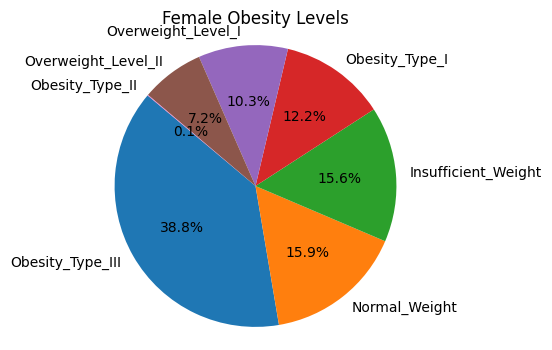

In [42]:

import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
female_data = df[df['Gender'] == 'Female']
female_counts = female_data['NObeyesdad'].value_counts()
female_ratios = female_counts / len(female_data) * 100

# ÌååÏù¥ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(4, 4))
plt.pie(female_ratios, labels=female_ratios.index, autopct='%1.1f%%', startangle=140)
plt.title('Female Obesity Levels')
plt.axis('equal')  # ÏõêÏùÑ ÏõêÌòïÏúºÎ°ú Ïú†ÏßÄ
plt.show()

In [43]:
male_data = df[df['Gender'] == 'Male']
male_counts = male_data['NObeyesdad'].value_counts()
male_ratios = male_counts / len(male_data) * 100
print(male_ratios)

NObeyesdad
Obesity_Type_II        31.346749
Overweight_Level_II    17.095588
Obesity_Type_I         15.895898
Normal_Weight          13.757740
Overweight_Level_I     13.128870
Insufficient_Weight     8.726780
Obesity_Type_III        0.048375
Name: count, dtype: float64


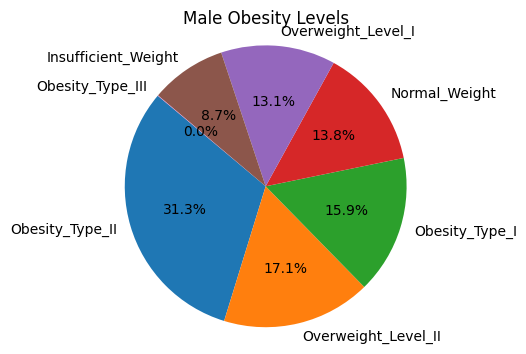

In [44]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
male_data = df[df['Gender'] == 'Male']
male_counts = male_data['NObeyesdad'].value_counts()
male_ratios = male_counts / len(male_data) * 100

# ÌååÏù¥ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(4, 4))
plt.pie(male_ratios, labels=male_ratios.index, autopct='%1.1f%%', startangle=140)
plt.title('Male Obesity Levels')
plt.axis('equal')  # ÏõêÏùÑ ÏõêÌòïÏúºÎ°ú Ïú†ÏßÄ
plt.show()


### ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÎπÑÎßåÎèÑ


| NObeyesdad          | Female (%) | Male (%) |
|---------------------|------------|----------|
| Insufficient_Weight | 15.553637       | 8.726780    |
| Normal_Weight       | 15.927845      | 13.757740   |
| Overweight_Level_I  | 10.266743       | 13.128870 |
| Overweight_Level_II | 7.244291      | 17.095588     |
| Obesity_Type_I      | 12.156976      | 15.895898    |
| Obesity_Type_II     | 0.076761      | 31.346749    |
| Obesity_Type_III    | 38.773748      | 0.048375    |


## 2. Í∞ÄÏ°±Ïù¥Î†• ‚ÜîÔ∏è ÎπÑÎßåÎèÑ

In [45]:
df['family_history_with_overweight'].value_counts() / len(df) * 100

family_history_with_overweight
yes    81.96358
no     18.03642
Name: count, dtype: float64

In [46]:
counts = df[df['family_history_with_overweight'] == 'yes']['NObeyesdad'].value_counts()
ratios = counts / len(df[df['family_history_with_overweight'] == 'yes']) * 100
print(ratios)

NObeyesdad
Obesity_Type_III       23.774539
Obesity_Type_II        19.060773
Obesity_Type_I         16.821441
Overweight_Level_II    13.688727
Normal_Weight          10.520748
Overweight_Level_I      9.821324
Insufficient_Weight     6.312449
Name: count, dtype: float64


In [47]:
counts = df[df['family_history_with_overweight'] == 'no']['NObeyesdad'].value_counts()
ratios = counts / len(df[df['family_history_with_overweight'] == 'no']) * 100
print(ratios)

NObeyesdad
Insufficient_Weight    38.701923
Normal_Weight          34.508547
Overweight_Level_I     20.192308
Overweight_Level_II     5.154915
Obesity_Type_I          1.282051
Obesity_Type_II         0.133547
Obesity_Type_III        0.026709
Name: count, dtype: float64



### Í∞ÄÏ°±Î†•Ïóê Îî∞Î•∏ ÎπÑÎßåÎèÑ

| NObeyesdad          | family_history_with_overweight (==yes) | family_history_with_overweight (==no) |
|---------------------|---------------------|---------------------|
| Insufficient_Weight |  6.31%              | 38.70%              |
| Normal_Weight       | 10.52%              | 34.51%              |
| Overweight_Level_I  |  9.82%              | 20.19%              |
| Overweight_Level_II | 13.69%              |  5.15%              |
| Obesity_Type_I      | 16.82%              |  1.28%              |
| Obesity_Type_II     | 19.06%              |  0.13%              |
| Obesity_Type_III    | 23.77%              |  0.02%              |


## 3. ÎÇòÏù¥ÎåÄ ‚ÜîÔ∏è ÎπÑÎßåÎèÑ

In [48]:
# 10ÎåÄ: 10~19ÏÑ∏, 20ÎåÄ: 20~29ÏÑ∏, 30ÎåÄ: 30ÏÑ∏ Ïù¥ÏÉÅ
bins = [10, 20, 30,40,50,60,70,80,float('inf')]
labels = ['10ÎåÄ', '20ÎåÄ', '30ÎåÄ','40ÎåÄ','50ÎåÄ','60ÎåÄ','70ÎåÄ','80ÎåÄ']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [49]:
df['Age_Group'].value_counts()

Age_Group
20ÎåÄ    12722
10ÎåÄ     5140
30ÎåÄ     2509
40ÎåÄ      317
50ÎåÄ       68
60ÎåÄ        2
70ÎåÄ        0
80ÎåÄ        0
Name: count, dtype: int64

In [50]:
df[df['Age_Group']=='20ÎåÄ']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='20ÎåÄ']) * 100

NObeyesdad
Obesity_Type_III       29.107059
Obesity_Type_II        16.530420
Normal_Weight          13.889326
Obesity_Type_I         13.661374
Overweight_Level_I     11.326835
Overweight_Level_II     9.778337
Insufficient_Weight     5.706650
Name: count, dtype: float64

In [51]:
df[df['Age_Group']=='30ÎåÄ']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='30ÎåÄ']) * 100

NObeyesdad
Obesity_Type_II        42.925468
Overweight_Level_II    25.906736
Obesity_Type_I         16.301315
Overweight_Level_I     11.279394
Normal_Weight           3.188521
Insufficient_Weight     0.358709
Obesity_Type_III        0.039857
Name: count, dtype: float64

In [52]:
df[df['Age_Group']=='40ÎåÄ']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='40ÎåÄ']) * 100

NObeyesdad
Obesity_Type_I         54.258675
Overweight_Level_II    18.296530
Obesity_Type_II        17.034700
Overweight_Level_I      8.201893
Normal_Weight           1.577287
Insufficient_Weight     0.630915
Name: count, dtype: float64

In [53]:
df[df['Age_Group']=='50ÎåÄ']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='50ÎåÄ']) * 100

NObeyesdad
Overweight_Level_II    77.941176
Overweight_Level_I     14.705882
Obesity_Type_I          4.411765
Normal_Weight           1.470588
Obesity_Type_II         1.470588
Name: count, dtype: float64

In [54]:
df[df['Age_Group']=='10ÎåÄ']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='10ÎåÄ']) * 100

NObeyesdad
Insufficient_Weight    34.747082
Normal_Weight          23.910506
Overweight_Level_I     12.937743
Obesity_Type_I         11.439689
Overweight_Level_II    10.058366
Obesity_Type_III        6.653696
Obesity_Type_II         0.252918
Name: count, dtype: float64

### Ïó∞Î†πÎåÄÏóê Îî∞Î•∏ ÎπÑÎßåÎèÑ

| Age_group           | 10s(%)       | 20s(%)       | 30s(%)       | 40s(%)       | 50s(%)       |
|---------------------|-----------|-----------|-----------|-----------|-----------|
| Insufficient_Weight | 34.747082 | 5.706650  | 0.358709  | 0.630915  | x         |
| Normal_Weight       | 23.910506 | 13.889326 | 3.188521  | 1.577287  | 1.470588  |
| Overweight_Level_I  | 12.937743 | 11.326835 | 11.279394 | 8.201893  | 14.705882 |
| Overweight_Level_II | 10.058366 | 9.778337  | 25.906736 | 18.296530 | 77.941176 |
| Obesity_Type_I      | 11.439689 | 13.661374 | 16.301315 | 54.258675 | 4.411765  |
| Obesity_Type_II     | 0.252918  | 16.530420 | 42.925468 | 17.034700 | 1.470588  |
| Obesity_Type_III    | 6.653696  | 29.107059 | 0.039857  | x         | x         |

In [55]:
df['Age_Group'].value_counts() / len(df['Age_Group']) * 100
#20ÎåÄÏùò ÎπÑÏ§ëÏù¥ Ï†úÏùº ÎÜíÏùå. 

Age_Group
20ÎåÄ    61.287215
10ÎåÄ    24.761538
30ÎåÄ    12.086906
40ÎåÄ     1.527122
50ÎåÄ     0.327585
60ÎåÄ     0.009635
70ÎåÄ     0.000000
80ÎåÄ     0.000000
Name: count, dtype: float64

## 4. 10,20,30ÎåÄ ÎÇ®Ïó¨Ïóê Îî∞Î•∏ ÎπÑÎßåÎèÑ

In [56]:
# 20ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®
female_obesity = df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]) * 100

# 20ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®
male_obesity = df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Male')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Male')]) * 100

print("20ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:")
print(female_obesity)

print("\n20ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:")
print(male_obesity)


20ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:
NObeyesdad
Obesity_Type_III       54.817670
Normal_Weight          13.489475
Obesity_Type_I          9.072043
Overweight_Level_I      8.612511
Insufficient_Weight     8.345686
Overweight_Level_II     5.647791
Obesity_Type_II         0.014824
Name: count, dtype: float64

20ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:
NObeyesdad
Obesity_Type_II        35.174029
Obesity_Type_I         18.842035
Overweight_Level_II    14.441098
Overweight_Level_I     14.390897
Normal_Weight          14.340696
Insufficient_Weight     2.727577
Obesity_Type_III        0.083668
Name: count, dtype: float64


In [57]:
# 20ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®
female_obesity = df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')]) * 100

# 20ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®
male_obesity = df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Male')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Male')]) * 100

print("10ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:")
print(female_obesity)

print("\n10ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:")
print(male_obesity)


10ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:
NObeyesdad
Insufficient_Weight    38.126362
Normal_Weight          25.599129
Obesity_Type_III       12.418301
Overweight_Level_I     10.203341
Obesity_Type_I          8.460421
Overweight_Level_II     5.156137
Obesity_Type_II         0.036311
Name: count, dtype: float64

10ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:
NObeyesdad
Insufficient_Weight    30.846605
Normal_Weight          21.961442
Overweight_Level_I     16.093881
Overweight_Level_II    15.716681
Obesity_Type_I         14.878458
Obesity_Type_II         0.502934
Name: count, dtype: float64


In [58]:
# 30ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®
female_obesity = df[(df['Age_Group']=='30ÎåÄ') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='30ÎåÄ') & (df['Gender']=='Female')]) * 100

# 30ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®
male_obesity = df[(df['Age_Group']=='30ÎåÄ') & (df['Gender']=='Male')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='30ÎåÄ') & (df['Gender']=='Male')]) * 100

print("30ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:")
print(female_obesity)

print("\n30ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:")
print(male_obesity)

30ÎåÄ Ïó¨ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:
NObeyesdad
Obesity_Type_I         39.714286
Overweight_Level_II    26.571429
Overweight_Level_I     26.142857
Normal_Weight           5.571429
Insufficient_Weight     1.000000
Obesity_Type_II         0.857143
Obesity_Type_III        0.142857
Name: count, dtype: float64

30ÎåÄ ÎÇ®ÏÑ±Ïùò ÎπÑÎßåÎèÑ ÎπÑÏú®:
NObeyesdad
Obesity_Type_II        59.203980
Overweight_Level_II    25.649530
Obesity_Type_I          7.241570
Overweight_Level_I      5.527916
Normal_Weight           2.266446
Insufficient_Weight     0.110558
Name: count, dtype: float64



### 10ÎåÄ ÎÇ®Ïó¨Ïùò ÎπÑÎßåÎèÑ

| 10s Age_group       | Female    | Male      |
|---------------------|-----------|-----------|
| Insufficient_Weight | 38.126362 | 30.846605 |
| Normal_Weight       | 25.599129 | 21.961442 |
| Overweight_Level_I  | 10.203341 | 16.093881 |
| Overweight_Level_II | 5.156137  | 15.716681 |
| Obesity_Type_I      | 8.460421  | 14.878458 |
| Obesity_Type_II     | 0.036311  | 0.502934  |
| Obesity_Type_III    | 12.418301 | x         |



### 20ÎåÄ ÎÇ®Ïó¨Ïùò ÎπÑÎßåÎèÑ 

| 20s Age_group       | Female    | Male      |
|---------------------|-----------|-----------|
| Insufficient_Weight | 8.345686  | 2.727577  |
| Normal_Weight       | 13.489475 | 14.340696 |
| Overweight_Level_I  | 8.612511  | 14.390897 |
| Overweight_Level_II | 5.647791  | 14.441098 |
| Obesity_Type_I      | 9.072043  | 18.842035 |
| Obesity_Type_II     | 0.014824  | 35.174029 |
| Obesity_Type_III    | 54.817670 | 0.083668  |


### 30ÎåÄ ÎÇ®Ïó¨Ïùò ÎπÑÎßåÎèÑ
| 30s Age_group       | Female    | Male      |
|---------------------|-----------|-----------|
| Insufficient_Weight | 1.000000  | 0.110558  |
| Normal_Weight       | 5.571429  | 2.266446  |
| Overweight_Level_I  | 26.142857 | 5.527916  |
| Overweight_Level_II | 26.571429 | 25.649530 |
| Obesity_Type_I      | 39.714286 | 7.241570  |
| Obesity_Type_II     | 0.857143  | 59.203980 |
| Obesity_Type_III    | 0.142857  | x         |

# [part4] 10ÎåÄ Ïó¨ÏÑ±Í≥º 20ÎåÄ Ïó¨ÏÑ±Îßå ÏßëÏ§ëÌï¥ÏÑú ÎπÑÎßåÎèÑ ÎπÑÍµê

In [59]:
df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')]) * 100

NObeyesdad
Insufficient_Weight    38.126362
Normal_Weight          25.599129
Obesity_Type_III       12.418301
Overweight_Level_I     10.203341
Obesity_Type_I          8.460421
Overweight_Level_II     5.156137
Obesity_Type_II         0.036311
Name: count, dtype: float64

In [60]:
df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]) * 100

NObeyesdad
Obesity_Type_III       54.817670
Normal_Weight          13.489475
Obesity_Type_I          9.072043
Overweight_Level_I      8.612511
Insufficient_Weight     8.345686
Overweight_Level_II     5.647791
Obesity_Type_II         0.014824
Name: count, dtype: float64

## 1. Ïñ¥Îñ§ ÏßëÎã®Ïù¥ Í≥†ÏπºÎ°úÎ¶¨Î•º Îçî ÎßéÏù¥ ÏÑ≠Ï∑®ÌïòÎäîÍ∞Ä?


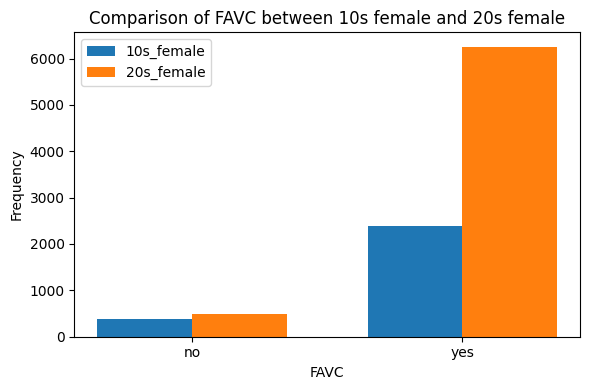

In [69]:
import numpy as np

# early_20sÏôÄ late_20sÏùò FAVC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
calc_10s_female = df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')]['FAVC'].value_counts().sort_index()
calc_20s_female = df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]['FAVC'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = calc_10s_female.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, calc_10s_female, width, label='10s_female')
plt.bar(x + width/2, calc_20s_female, width, label='20s_female')
plt.xlabel('FAVC')
plt.ylabel('Frequency')
plt.title('Comparison of FAVC between 10s female and 20s female')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()

## üéØ 3. Ïà´ÏûêÌòï Î≥ÄÏàòÎì§Ïùò ÌèâÍ∑†Í∞í ÎπÑÍµê (10ÎåÄ Ïó¨ÏÑ± vs 20ÎåÄ Ïó¨ÏÑ±)
- 10ÎåÄ Ïó¨ÏÑ±Ïù¥ Ïã†Ï≤¥ ÌôúÎèôÏùò ÎπàÎèÑ ÌèâÍ∑†Ïù¥ Îçî ÎÜíÎã§.

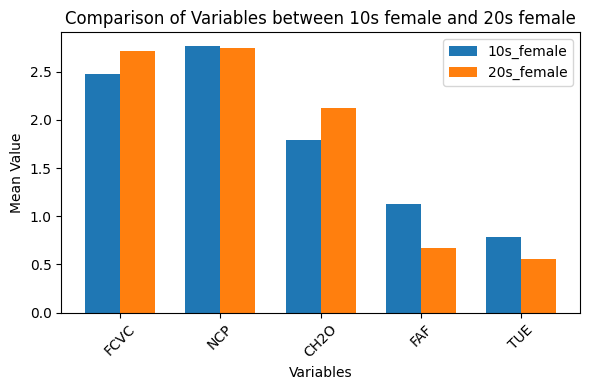

In [63]:
import numpy as np

# late_20sÏôÄ early_20sÏùò Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌèâÍ∑† Í≥ÑÏÇ∞
means_10s_female = df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
means_20s_female = df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()

# Ìï≠Î™©Îì§
categories = means_10s_female.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x, means_10s_female, width, label='10s_female')
plt.bar(x + width, means_20s_female, width, label='20s_female')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Comparison of Variables between 10s female and 20s female')
plt.xticks(x + width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 4. ÏùåÏ£º Ï†ïÎèÑÍ∞Ä Ï∞®Ïù¥Î•º ÎßåÎäêÎÇò?

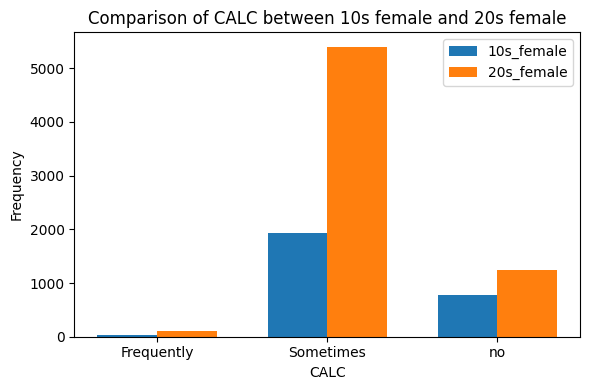

In [67]:
import numpy as np

# early_20sÏôÄ late_20sÏùò FAVC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
calc_10s_female = df[(df['Age_Group']=='10ÎåÄ') & (df['Gender']=='Female')]['CALC'].value_counts().sort_index()
calc_20s_female = df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]['CALC'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = calc_10s_female.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, calc_10s_female, width, label='10s_female')
plt.bar(x + width/2, calc_20s_female, width, label='20s_female')
plt.xlabel('CALC')
plt.ylabel('Frequency')
plt.title('Comparison of CALC between 10s female and 20s female')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()

# [part5] 20ÎåÄ Ïó¨ÏÑ±Ïóê ÏßëÏ§ëÌï¥ÏÑú ÏÇ¥Ìé¥Î≥¥Í∏∞

In [70]:
f_df = df[(df['Age_Group']=='20ÎåÄ') & (df['Gender']=='Female')]

In [71]:
bins = [20, 25, float('inf')]
labels = ['early_20s', 'late_20s']
f_df['20_Age_Group'] = pd.cut(f_df['Age'], bins=bins, labels=labels, right=False)


/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_91831/647180393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['20_Age_Group'] = pd.cut(f_df['Age'], bins=bins, labels=labels, right=False)


In [72]:
f_df

id  Gender  Age  Height  Weight family_history_with_overweight FAVC  \
3          3  Female   20    1.71     131                            yes  yes   
9          9  Female   26    1.64     111                            yes  yes   
10        10  Female   20    1.65      65                            yes  yes   
13        13  Female   21    1.73     131                            yes  yes   
14        14  Female   20    1.57      49                             no   no   
...      ...     ...  ...     ...     ...                            ...  ...   
20737  20737  Female   25    1.63     104                            yes  yes   
20740  20740  Female   20    1.59      49                             no   no   
20744  20744  Female   26    1.64     111                            yes  yes   
20749  20749  Female   25    1.65     104                            yes  yes   
20751  20751  Female   21    1.61     133                            yes  yes   

       FCVC  NCP       CAEC  ...      CH2O  SCC       FAF       TUE  \
3       3.0  3.0  Sometimes  ...  1.674061   no  1.467863  0.780199   
9       3.0  3.0  Sometimes  ...  2.632253   no  0.000000  0.218645   
10      3.0  3.0  Sometimes  ...  3.000000   no  1.000000  0.000000   
13      3.0  3.0  Sometimes  ...  1.959531   no  1.425712  0.947884   
14      2.0  1.0  Sometimes  ...  1.000000   no  3.000000  2.000000   
...     ...  ...        ...  ...       ...  ...       ...       ...   
20737   3.0  3.0  Sometimes  ...  1.322004   no  0.246290  0.723154   
20740   2.0  3.0  Sometimes  ...  2.000000   no  2.000000  0.000000   
20744   3.0  3.0  Sometimes  ...  2.396977   no  0.000000  0.037078   
20749   3.0  3.0  Sometimes  ...  1.530992   no  0.015860  0.445495   
20751   3.0  3.0  Sometimes  ...  2.839069   no  1.683497  0.143675   

            CALC                 MTRANS          NObeyesdad   BMI  Age_Group  \
3      Sometimes  Public_Transportation    Obesity_Type_III  44.8        20ÎåÄ   
9      Sometimes  Public_Transportation    Obesity_Type_III  41.3        20ÎåÄ   
10     Sometimes  Public_Transportation  Overweight_Level_I  23.9        20ÎåÄ   
13     Sometimes  Public_Transportation    Obesity_Type_III  43.8        20ÎåÄ   
14            no                Walking       Normal_Weight  19.9        20ÎåÄ   
...          ...                    ...                 ...   ...        ...   
20737  Sometimes  Public_Transportation    Obesity_Type_III  39.1        20ÎåÄ   
20740  Sometimes  Public_Transportation       Normal_Weight  19.4        20ÎåÄ   
20744  Sometimes  Public_Transportation    Obesity_Type_III  41.3        20ÎåÄ   
20749  Sometimes  Public_Transportation    Obesity_Type_III  38.2        20ÎåÄ   
20751  Sometimes  Public_Transportation    Obesity_Type_III  51.3        20ÎåÄ   

      20_Age_Group  
3        early_20s  
9         late_20s  
10       early_20s  
13       early_20s  
14       early_20s  
...            ...  
20737     late_20s  
20740    early_20s  
20744     late_20s  
20749     late_20s  
20751    early_20s  

[6746 rows x 21 columns]

In [73]:
f_df[f_df['20_Age_Group']=='early_20s']['NObeyesdad'].value_counts() / len(f_df[f_df['20_Age_Group']=='early_20s']) * 100

NObeyesdad
Obesity_Type_III       29.667452
Normal_Weight          21.314480
Insufficient_Weight    14.480230
Obesity_Type_I         14.401676
Overweight_Level_I     12.516366
Overweight_Level_II     7.619796
Name: count, dtype: float64

In [74]:
f_df[f_df['20_Age_Group']=='late_20s']['NObeyesdad'].value_counts() / len(f_df[f_df['20_Age_Group']=='late_20s']) * 100

NObeyesdad
Obesity_Type_III       87.632388
Overweight_Level_I      3.518961
Normal_Weight           3.279809
Overweight_Level_II     3.074821
Obesity_Type_I          2.118210
Insufficient_Weight     0.341647
Obesity_Type_II         0.034165
Name: count, dtype: float64

### 20ÎåÄ Ïó¨ÏÑ±ÏùÑ Ï¥àÏ§ëÎ∞ò, ÌõÑÎ∞òÎåÄÎ°ú ÎÇòÎàÑÏñ¥ÏÑú ÎπÑÎßåÎèÑ ÏÇ¥Ìé¥Î≥¥Í∏∞
| 20s FEMALE          | early_20s | late_20s  |
|---------------------|-----------|-----------|
| Insufficient_Weight | 14.480230 | 0.341647  |
| Normal_Weight       | 21.314480 | 3.279809  |
| Overweight_Level_I  | 12.516366 | 3.518961  |
| Overweight_Level_II | 7.619796  | 3.074821  |
| Obesity_Type_I      | 14.401676 | 2.118210  |
| Obesity_Type_II     | 7.619796  | 0.034165  |
| Obesity_Type_III    | 29.667452 | 87.632388 |

## 20ÎåÄ Ïó¨ÏÑ±Ïùò Ïà´ÏûêÌòï Î≥ÄÏàò ÏπºÎüºÎì§ ÌèâÍ∑†Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

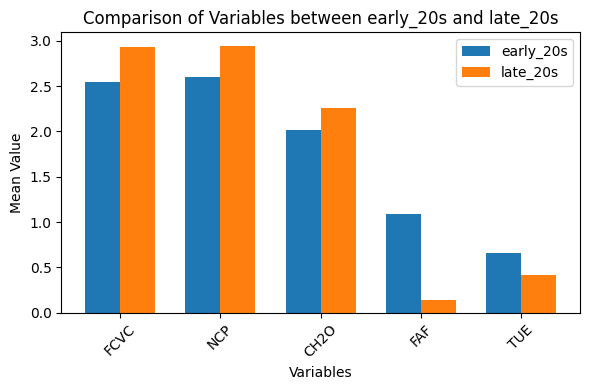

In [75]:
import numpy as np

# late_20sÏôÄ early_20sÏùò Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌèâÍ∑† Í≥ÑÏÇ∞
late_20s_means = f_df[f_df['20_Age_Group']=='late_20s'][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
early_20s_means = f_df[f_df['20_Age_Group']=='early_20s'][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()

# Ìï≠Î™©Îì§
categories = late_20s_means.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x, early_20s_means, width, label='early_20s')
plt.bar(x + width, late_20s_means, width, label='late_20s')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Comparison of Variables between early_20s and late_20s')
plt.xticks(x + width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞í ÏúÑÏ£ºÎ°ú ÏÇ¥Ìé¥Î≥¥Í∏∞

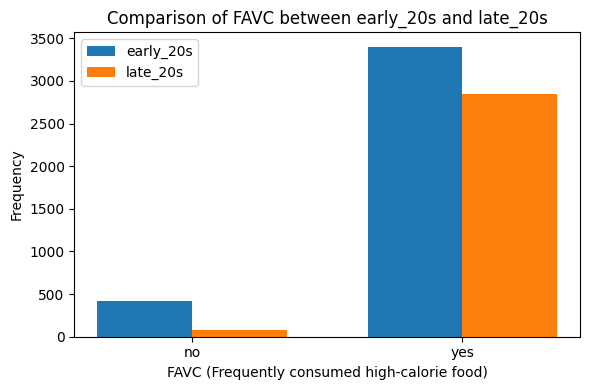

In [88]:
import numpy as np

# early_20sÏôÄ late_20sÏùò FAVC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['FAVC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['FAVC'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = early_20s_favc_freq.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('FAVC (Frequently consumed high-calorie food)')
plt.ylabel('Frequency')
plt.title('Comparison of FAVC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


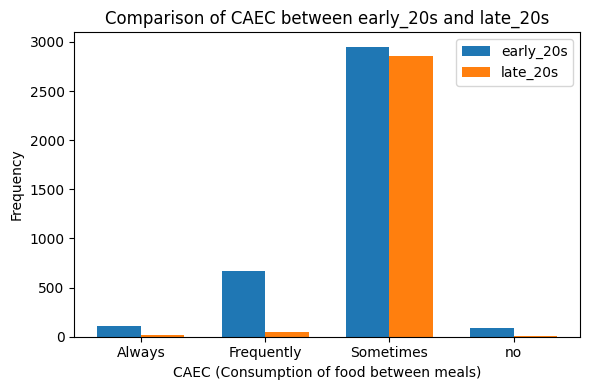

In [87]:
import numpy as np

# early_20sÏôÄ late_20sÏùò FAVC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['CAEC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['CAEC'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = early_20s_favc_freq.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('CAEC (Consumption of food between meals)')
plt.ylabel('Frequency')
plt.title('Comparison of CAEC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


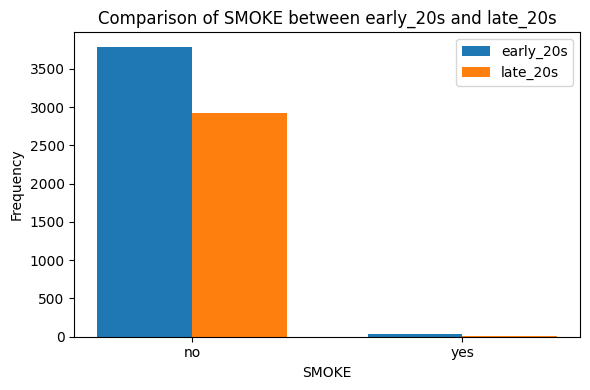

In [78]:
import numpy as np

# early_20sÏôÄ late_20sÏùò FAVC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['SMOKE'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['SMOKE'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = early_20s_favc_freq.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('SMOKE')
plt.ylabel('Frequency')
plt.title('Comparison of SMOKE between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


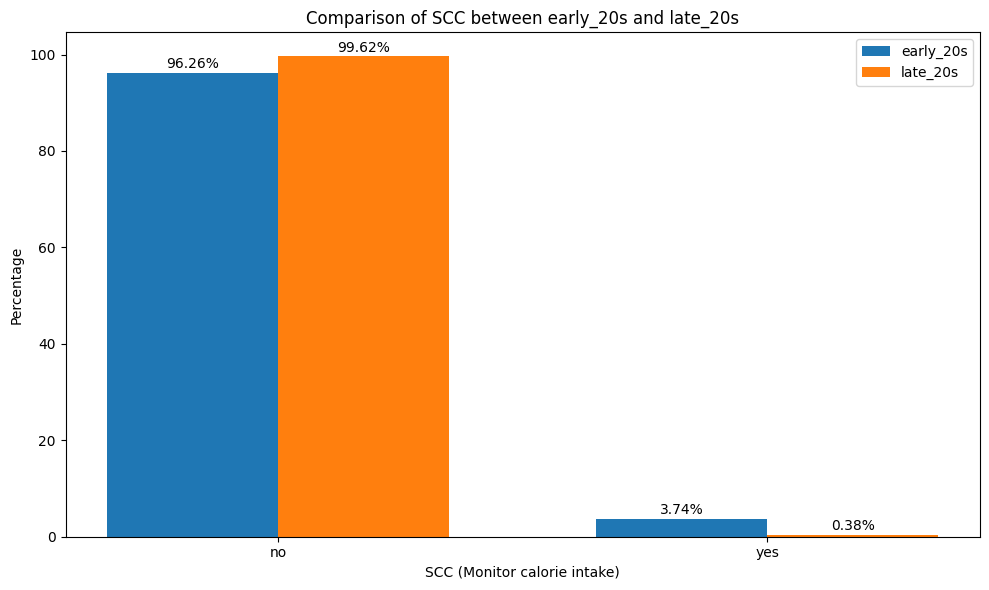

In [86]:
import numpy as np

# early_20sÏôÄ late_20sÏùò FAVC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['SCC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['SCC'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = early_20s_favc_freq.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# Ï†ÑÏ≤¥ Ìï© Í≥ÑÏÇ∞
total_early_20s = early_20s_favc_freq.sum()
total_late_20s = late_20s_favc_freq.sum()

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, early_20s_favc_freq / total_early_20s * 100, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq / total_late_20s * 100, width, label='late_20s')
plt.xlabel('SCC (Monitor calorie intake)')
plt.ylabel('Percentage')
plt.title('Comparison of SCC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()

# ÎßâÎåÄ ÏúÑÏóê ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for i, freq in enumerate(early_20s_favc_freq):
    plt.text(x[i] - width/2, freq / total_early_20s * 100 + 1, f'{freq / total_early_20s * 100:.2f}%', ha='center')
for i, freq in enumerate(late_20s_favc_freq):
    plt.text(x[i] + width/2, freq / total_late_20s * 100 + 1, f'{freq / total_late_20s * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()


/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_91831/3818762778.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] - width/2, early_20s_calc_freq[i] + 0.5, f'{(early_20s_calc_freq[i] / total_early_20s * 100):.2f}%', ha='center')
/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_91831/3818762778.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] + width/2, late_20s_calc_freq[i] + 0.5, f'{(late_20s_calc_freq[i] / total_late_20s * 100):.2f}%', ha='center')


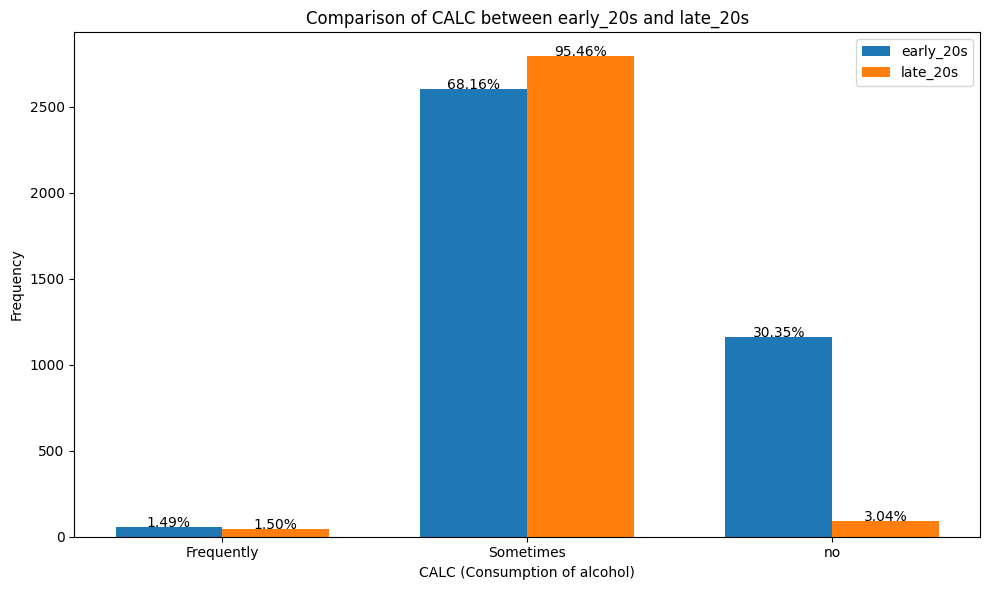

In [85]:
import numpy as np

# early_20sÏôÄ late_20sÏùò CALC Ìï≠Î™©Ïóê ÎåÄÌïú ÎπàÎèÑ Í≥ÑÏÇ∞
early_20s_calc_freq = f_df[f_df['20_Age_Group'] == 'early_20s']['CALC'].value_counts().sort_index()
late_20s_calc_freq = f_df[f_df['20_Age_Group'] == 'late_20s']['CALC'].value_counts().sort_index()

# Î≤îÏ£ºÎì§
categories = early_20s_calc_freq.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# Ï†ÑÏ≤¥ Ìï© Í≥ÑÏÇ∞
total_early_20s = early_20s_calc_freq.sum()
total_late_20s = late_20s_calc_freq.sum()

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, early_20s_calc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_calc_freq, width, label='late_20s')
plt.xlabel('CALC (Consumption of alcohol)')
plt.ylabel('Frequency')
plt.title('Comparison of CALC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()

# ÎßâÎåÄ ÏúÑÏóê Î∞±Î∂ÑÏú® ÌëúÏãú
for i in range(len(categories)):
    plt.text(x[i] - width/2, early_20s_calc_freq[i] + 0.5, f'{(early_20s_calc_freq[i] / total_early_20s * 100):.2f}%', ha='center')
    plt.text(x[i] + width/2, late_20s_calc_freq[i] + 0.5, f'{(late_20s_calc_freq[i] / total_late_20s * 100):.2f}%', ha='center')

plt.tight_layout()
plt.show()


## FAF Ï¶â ÌôúÎèôÎπàÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÎÇòÎãàÍπå ÏÇ¨Ïö©ÌïòÎäî ÍµêÌÜµÏàòÎã®ÏóêÎèÑ Ï∞®Ïù¥Í∞Ä ÏûàÎÇò?
- Î≥Ñ Ï∞®Ïù¥Îäî ÏóÜÎã§. 

In [81]:
f_df[f_df['20_Age_Group']=='early_20s']['MTRANS'].value_counts() / len(f_df[f_df['20_Age_Group']=='early_20s'])*100

MTRANS
Public_Transportation    95.705682
Automobile                2.697041
Walking                   1.335428
Bike                      0.130924
Motorbike                 0.130924
Name: count, dtype: float64

In [158]:
f_df[f_df['20_Age_Group']=='late_20s']['MTRANS'].value_counts() / len(f_df[f_df['20_Age_Group']=='late_20s'])*100

MTRANS
Public_Transportation    94.841134
Automobile                4.783054
Walking                   0.273317
Motorbike                 0.102494
Name: count, dtype: float64

## Í≤∞Î°†
- 20ÎåÄ ÌõÑÎ∞ò Ïó¨ÏÑ±Îì§ÏùÄ ÌôúÎèôÎüâÏù¥ ÎÑàÎ¨¥ Ï†ÅÎã§. 
- ÏïÑÎßà ÎåÄÌïôÏùÑ Ï°∏ÏóÖÌïòÍ≥† ÏùºÏùÑ ÏãúÏûëÌïòÎ©¥ÏÑú ÌôúÎèôÎüâÏù¥ Ï§ÑÏñ¥Îì† Í≤É ÏïÑÎãåÍ∞Ä Ïã∂Îã§.
- ÌôúÎèôÎüâÏùÑ Ï±ÑÏõåÏ§Ñ Ïàò ÏûàÎäî ÏãúÍ∞ÑÏù¥ ÌïÑÏöîÌïòÎã§. 

# [part6] 20ÎåÄ ÌõÑÎ∞ò Ïó¨ÏÑ±Îì§Ïóê ÎåÄÌï¥ÏÑúÎßå Ï¢Ä Îçî ÏïåÏïÑÎ≥¥Ïûê. 

In [91]:
late_20s_f_df = f_df[f_df['20_Age_Group']=='late_20s']

<Axes: >

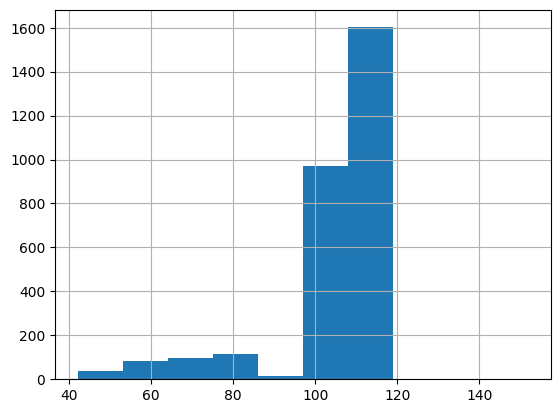

In [95]:
late_20s_f_df['Weight'].hist()

In [118]:
late_20s_f_df['Age'].value_counts()

Age
26    1731
25    1019
27      78
29      52
28      47
Name: count, dtype: int64

In [131]:
df[(df['Age'] == 24) & (df['Gender'] == 'Female')]['NObeyesdad'].value_counts() / len(df[(df['Age'] == 24) & (df['Gender'] == 'Female')]) * 100
 

NObeyesdad
Obesity_Type_III       43.137255
Normal_Weight          24.183007
Overweight_Level_II    15.032680
Obesity_Type_I          7.189542
Overweight_Level_I      5.882353
Insufficient_Weight     4.575163
Name: count, dtype: float64

In [132]:
late_20s_f_df[late_20s_f_df['Age']==25]['NObeyesdad'].value_counts() / len(late_20s_f_df[late_20s_f_df['Age']==25]) * 100

NObeyesdad
Obesity_Type_III       91.952895
Normal_Weight           3.532875
Obesity_Type_I          1.668302
Overweight_Level_I      1.275761
Overweight_Level_II     1.177625
Insufficient_Weight     0.392542
Name: count, dtype: float64

In [113]:
late_20s_f_df[late_20s_f_df['Age']==26]['NObeyesdad'].value_counts() / len(late_20s_f_df[late_20s_f_df['Age']==26]) * 100

NObeyesdad
Obesity_Type_III       94.049682
Overweight_Level_I      2.137493
Normal_Weight           1.964183
Obesity_Type_I          0.982091
Overweight_Level_II     0.635471
Insufficient_Weight     0.231080
Name: count, dtype: float64

In [114]:
late_20s_f_df[late_20s_f_df['Age']==27]['NObeyesdad'].value_counts() / len(late_20s_f_df[late_20s_f_df['Age']==27]) * 100

NObeyesdad
Overweight_Level_II    50.000000
Overweight_Level_I     26.923077
Normal_Weight          16.666667
Obesity_Type_I          5.128205
Insufficient_Weight     1.282051
Name: count, dtype: float64

In [117]:
late_20s_f_df[late_20s_f_df['Age']==28]['NObeyesdad'].value_counts() / len(late_20s_f_df[late_20s_f_df['Age']==28]) * 100

NObeyesdad
Overweight_Level_II    51.063830
Overweight_Level_I     21.276596
Normal_Weight          14.893617
Obesity_Type_I         10.638298
Obesity_Type_II         2.127660
Name: count, dtype: float64

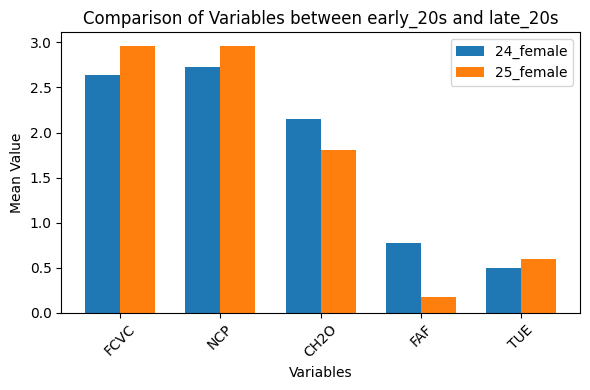

In [134]:
import numpy as np

# late_20sÏôÄ early_20sÏùò Í∞Å Ìï≠Î™©Ïóê ÎåÄÌïú ÌèâÍ∑† Í≥ÑÏÇ∞
f_24_means = df[(df['Age'] == 24) & (df['Gender'] == 'Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
f_25_means = df[(df['Age'] == 25) & (df['Gender'] == 'Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()

# Ìï≠Î™©Îì§
categories = f_24_means.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.35  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(6, 4))
plt.bar(x, f_24_means, width, label='24_female')
plt.bar(x + width, f_25_means, width, label='25_female')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Comparison of Variables between early_20s and late_20s')
plt.xticks(x + width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_91831/2470120003.py:27: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  plt.tight_layout()
/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


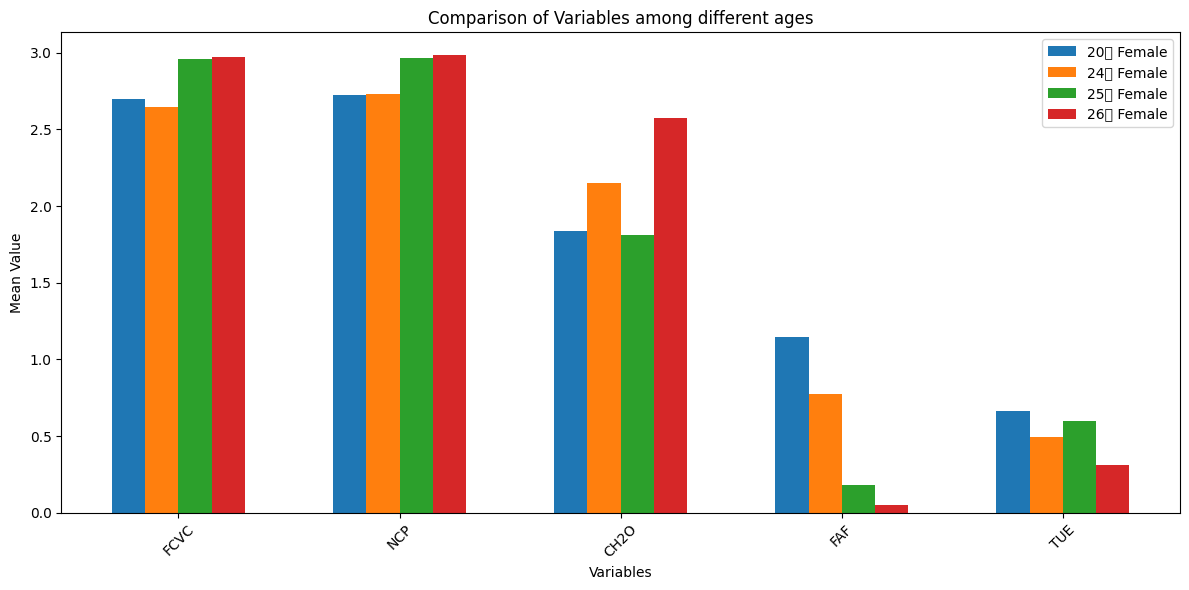

In [137]:
# Í∞Å Ïó∞Î†πÎåÄÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
f_20_means = df[(df['Age'] == 20) & (df['Gender'] == 'Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
f_24_means = df[(df['Age'] == 24) & (df['Gender'] == 'Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
f_25_means = df[(df['Age'] == 25) & (df['Gender'] == 'Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
f_26_means = df[(df['Age'] == 26) & (df['Gender'] == 'Female')][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()

# Ìï≠Î™©Îì§
categories = f_20_means.index

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(categories))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
width = 0.15  # ÎßâÎåÄÏùò ÎÑàÎπÑ
plt.figure(figsize=(12, 6))

plt.bar(x - 1.5*width, f_20_means, width, label='20ÏÇ¥ Female')
plt.bar(x - 0.5*width, f_24_means, width, label='24ÏÇ¥ Female')
plt.bar(x + 0.5*width, f_25_means, width, label='25ÏÇ¥ Female')
plt.bar(x + 1.5*width, f_26_means, width, label='26ÏÇ¥ Female')

plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Comparison of Variables among different ages')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


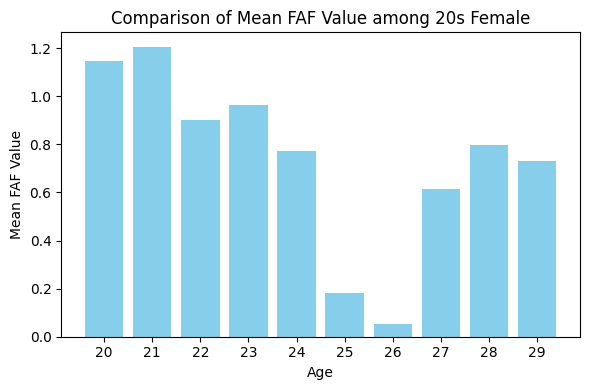

In [143]:
# Í∞Å Ïó∞Î†πÎåÄÏùò Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
f_20_FAF_mean = df[(df['Age'] == 20) & (df['Gender'] == 'Female')]['FAF'].mean()
f_21_FAF_mean = df[(df['Age'] == 21) & (df['Gender'] == 'Female')]['FAF'].mean()
f_22_FAF_mean = df[(df['Age'] == 22) & (df['Gender'] == 'Female')]['FAF'].mean()
f_23_FAF_mean = df[(df['Age'] == 23) & (df['Gender'] == 'Female')]['FAF'].mean()
f_24_FAF_mean = df[(df['Age'] == 24) & (df['Gender'] == 'Female')]['FAF'].mean()
f_25_FAF_mean = df[(df['Age'] == 25) & (df['Gender'] == 'Female')]['FAF'].mean()
f_26_FAF_mean = df[(df['Age'] == 26) & (df['Gender'] == 'Female')]['FAF'].mean()
f_27_FAF_mean = df[(df['Age'] == 27) & (df['Gender'] == 'Female')]['FAF'].mean()
f_28_FAF_mean = df[(df['Age'] == 28) & (df['Gender'] == 'Female')]['FAF'].mean()
f_29_FAF_mean = df[(df['Age'] == 29) & (df['Gender'] == 'Female')]['FAF'].mean()

# Ïó∞Î†πÎåÄ
age_groups = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29']

# ÌèâÍ∑† Í∞í
FAF_means = [f_20_FAF_mean, f_21_FAF_mean, f_22_FAF_mean, f_23_FAF_mean, f_24_FAF_mean, f_25_FAF_mean, f_26_FAF_mean, f_27_FAF_mean, f_28_FAF_mean, f_29_FAF_mean]

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6, 4))
plt.bar(age_groups, FAF_means, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Mean FAF Value')
plt.title('Comparison of Mean FAF Value among 20s Female')
plt.tight_layout()
plt.show()


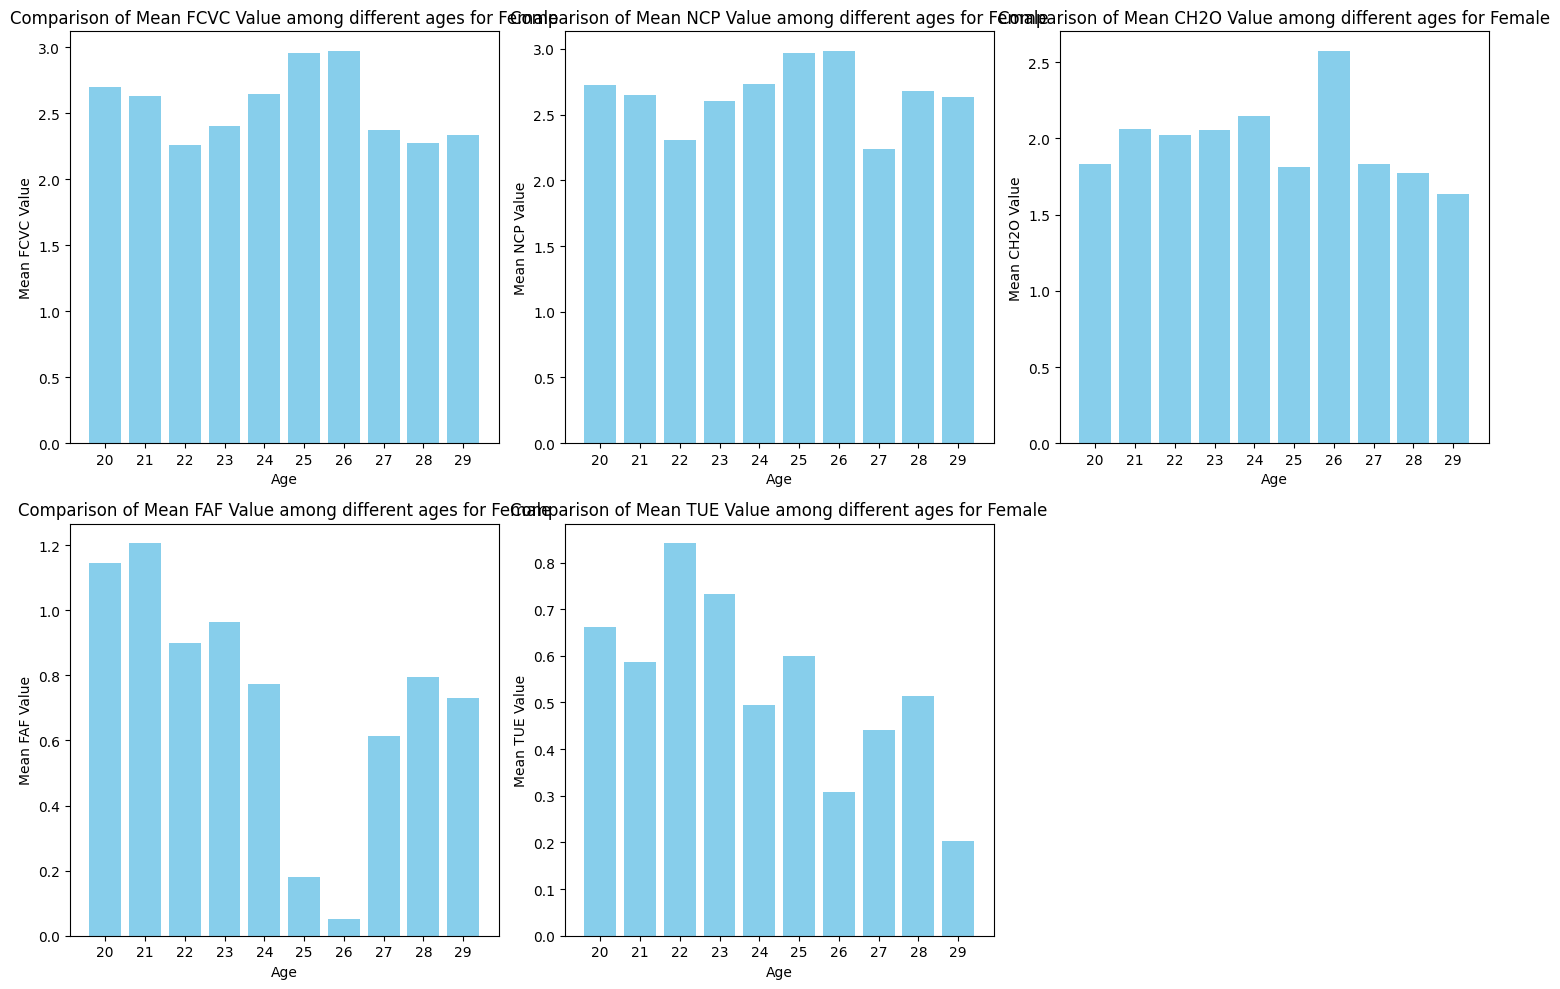

In [141]:
# Ìï≠Î™©Îì§
categories = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# ÌèâÍ∑†Í∞í Íµ¨ÌïòÍ∏∞
means_by_category = []
for category in categories:
    means_by_age = []
    for age in range(20, 30):
        mean_value = df[(df['Age'] == age) & (df['Gender'] == 'Female')][category].mean()
        means_by_age.append(mean_value)
    means_by_category.append(means_by_age)

# ÎßâÎåÄÏùò ÏúÑÏπò Ï°∞Ï†ï
x = np.arange(len(age_groups))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(15, 10))

for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)
    plt.bar(x, means_by_category[i], color='skyblue')
    plt.xlabel('Age')
    plt.ylabel(f'Mean {category} Value')
    plt.title(f'Comparison of Mean {category} Value among different ages for Female')
    plt.xticks(x, age_groups)
    plt.tight_layout()

plt.show()


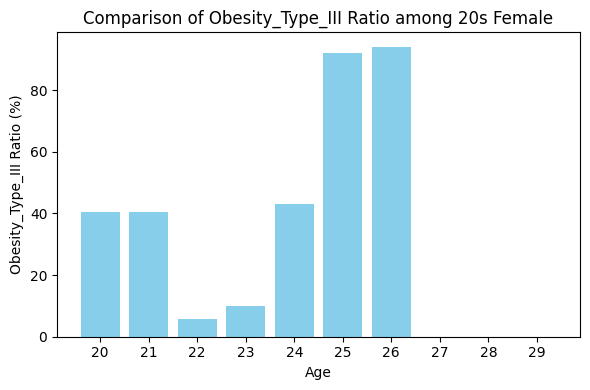

In [152]:
# ÎÇòÏù¥Í∞Ä 20ÏÑ∏Î∂ÄÌÑ∞ 29ÏÑ∏ÍπåÏßÄÏùò Ïó¨ÏÑ±Îì§ Ï§ë Obesity_Type_IIIÏù∏ ÏÇ¨ÎûåÎì§Ïùò ÎπÑÏú®ÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
obesity_type_III_ratios = []

# ÎÇòÏù¥Í∞Ä 20ÏÑ∏Î∂ÄÌÑ∞ 29ÏÑ∏ÍπåÏßÄ Î∞òÎ≥µÌïòÎ©¥ÏÑú Obesity_Type_IIIÏù∏ ÏÇ¨ÎûåÎì§Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
for age in range(20, 30):
    ratio = len(df[(df['Age'] == age) & (df['Gender'] == 'Female') & (df['NObeyesdad'] == 'Obesity_Type_III')]) / len(df[(df['Age'] == age) & (df['Gender'] == 'Female')]) * 100
    obesity_type_III_ratios.append(ratio)

# ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ±
age_groups = [str(age) for age in range(20, 30)]

# Î∞î Í∑∏ÎûòÌîÑÎ°ú ÌëúÏãú
plt.figure(figsize=(6, 4))
plt.bar(age_groups, obesity_type_III_ratios, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Obesity_Type_III Ratio (%)')
plt.title('Comparison of Obesity_Type_III Ratio among 20s Female')
plt.tight_layout()
plt.show()
